### 3-Analyte classification on the preprocessed  data using K-nn
### Edgar Acuna
### June 2021

In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)
ys=pd.read_csv("c://onr2020/substrateIDs.csv",header=None)
subs=pd.read_csv("c://onr2020/substrates.csv",header=None)
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
print('Size of the dataframe: {}'.format(dfset1.shape))

Size of the dataframe: (18000, 1701)


In [3]:
print('Size of the dataframe: {}'.format(subs.shape))

Size of the dataframe: (9, 1701)


In [4]:
dfset2=dfset1.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]

In [5]:
mdfsub1=dfsub1.iloc[:,0:1701]
mdfsub2=dfsub2.iloc[:,0:1701]
mdfsub3=dfsub3.iloc[:,0:1701]
mdfsub4=dfsub4.iloc[:,0:1701]
mdfsub5=dfsub5.iloc[:,0:1701]
mdfsub6=dfsub6.iloc[:,0:1701]
mdfsub7=dfsub7.iloc[:,0:1701]
mdfsub8=dfsub8.iloc[:,0:1701]
mdfsub9=dfsub9.iloc[:,0:1701]

In [6]:
y1=subs.loc[0,:]
y2=subs.loc[1,:]
y3=subs.loc[2,:]
y4=subs.loc[3,:]
y5=subs.loc[4,:]
y6=subs.loc[5,:]
y7=subs.loc[6,:]
y8=subs.loc[7,:]
y9=subs.loc[8,:]

###  Centering

In [7]:
modsub1=mdfsub1.apply(lambda x : x -(np.sum(np.array(x)*np.array(y1))/np.sum(np.array(y1)*np.array(y1)))*y1,axis=1)
modsub2=mdfsub2.apply(lambda x : x -(np.sum(np.array(x)*np.array(y2))/np.sum(np.array(y2)*np.array(y2)))*y2,axis=1)
modsub3=mdfsub3.apply(lambda x : x -(np.sum(np.array(x)*np.array(y3))/np.sum(np.array(y3)*np.array(y3)))*y3,axis=1)
modsub4=mdfsub4.apply(lambda x : x -(np.sum(np.array(x)*np.array(y4))/np.sum(np.array(y4)*np.array(y4)))*y4,axis=1)
modsub5=mdfsub5.apply(lambda x : x -(np.sum(np.array(x)*np.array(y5))/np.sum(np.array(y5)*np.array(y5)))*y5,axis=1)
modsub6=mdfsub6.apply(lambda x : x -(np.sum(np.array(x)*np.array(y6))/np.sum(np.array(y6)*np.array(y6)))*y6,axis=1)
modsub7=mdfsub7.apply(lambda x : x -(np.sum(np.array(x)*np.array(y7))/np.sum(np.array(y7)*np.array(y7)))*y7,axis=1)
modsub8=mdfsub8.apply(lambda x : x -(np.sum(np.array(x)*np.array(y8))/np.sum(np.array(y8)*np.array(y8)))*y8,axis=1)
modsub9=mdfsub9.apply(lambda x : x -(np.sum(np.array(x)*np.array(y9))/np.sum(np.array(y9)*np.array(y9)))*y9,axis=1)

In [8]:
subdf=[modsub1,modsub2,modsub3,modsub4,modsub5,modsub6,modsub7,modsub8,modsub9]
cent_subs=pd.concat(subdf)
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.002296,0.002603,0.002368,0.003507,0.003637,0.003537,0.004850,0.005059,0.004744,0.006244,...,-0.001858,-0.002531,-0.002143,-0.004422,-0.003123,-0.000884,-0.001225,-0.001406,-0.002792,-0.002432
5,-0.005471,0.003865,0.000351,-0.000060,-0.000258,-0.000582,0.002557,0.003072,0.000961,0.003941,...,-0.004245,-0.001915,-0.005149,-0.001717,-0.003814,-0.003100,-0.000355,-0.000540,-0.005481,-0.000857
8,-0.002496,0.016867,0.014204,0.005327,0.003649,0.006143,-0.015160,0.004201,0.003791,0.004599,...,0.002574,-0.018040,-0.018488,-0.006529,0.009548,0.004694,0.000399,0.018158,0.016369,0.007582
28,0.001313,0.001443,0.001536,0.001612,0.001687,0.001768,0.001866,0.001979,0.002079,0.002155,...,-0.004576,-0.004550,-0.004524,-0.004502,-0.004476,-0.004446,-0.004411,-0.004373,-0.004332,-0.004301
46,-0.001097,0.000040,0.001125,0.002056,0.001685,0.002006,0.000228,0.001179,0.001835,0.002005,...,-0.004655,-0.006438,-0.005102,-0.005563,-0.004804,-0.005517,-0.004411,-0.005738,-0.005031,-0.005584


### Normalization

In [9]:
b=cent_subs.iloc[:,0:1701]
b.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.002296,0.002603,0.002368,0.003507,0.003637,0.003537,0.004850,0.005059,0.004744,0.006244,...,-0.001858,-0.002531,-0.002143,-0.004422,-0.003123,-0.000884,-0.001225,-0.001406,-0.002792,-0.002432
5,-0.005471,0.003865,0.000351,-0.000060,-0.000258,-0.000582,0.002557,0.003072,0.000961,0.003941,...,-0.004245,-0.001915,-0.005149,-0.001717,-0.003814,-0.003100,-0.000355,-0.000540,-0.005481,-0.000857
8,-0.002496,0.016867,0.014204,0.005327,0.003649,0.006143,-0.015160,0.004201,0.003791,0.004599,...,0.002574,-0.018040,-0.018488,-0.006529,0.009548,0.004694,0.000399,0.018158,0.016369,0.007582
28,0.001313,0.001443,0.001536,0.001612,0.001687,0.001768,0.001866,0.001979,0.002079,0.002155,...,-0.004576,-0.004550,-0.004524,-0.004502,-0.004476,-0.004446,-0.004411,-0.004373,-0.004332,-0.004301
46,-0.001097,0.000040,0.001125,0.002056,0.001685,0.002006,0.000228,0.001179,0.001835,0.002005,...,-0.004655,-0.006438,-0.005102,-0.005563,-0.004804,-0.005517,-0.004411,-0.005738,-0.005031,-0.005584


In [10]:
#normalize(b)
b1=b.apply(lambda x: x/(x**2).sum()**.5, axis=1)
b1.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.006593,0.007476,0.006800,0.010072,0.010446,0.010157,0.013928,0.014528,0.013623,0.017932,...,-0.005337,-0.007268,-0.006155,-0.012700,-0.008968,-0.002538,-0.003519,-0.004037,-0.008019,-0.006984
5,-0.016333,0.011538,0.001048,-0.000179,-0.000770,-0.001737,0.007633,0.009170,0.002870,0.011766,...,-0.012672,-0.005718,-0.015373,-0.005127,-0.011386,-0.009255,-0.001060,-0.001612,-0.016363,-0.002559
8,-0.005348,0.036134,0.030431,0.011412,0.007818,0.013162,-0.032478,0.008999,0.008123,0.009853,...,0.005515,-0.038647,-0.039608,-0.013988,0.020456,0.010057,0.000856,0.038902,0.035069,0.016243
28,0.004714,0.005182,0.005515,0.005790,0.006058,0.006349,0.006700,0.007108,0.007465,0.007738,...,-0.016436,-0.016340,-0.016247,-0.016168,-0.016075,-0.015967,-0.015840,-0.015707,-0.015558,-0.015445
46,-0.003245,0.000118,0.003326,0.006083,0.004984,0.005934,0.000673,0.003487,0.005428,0.005932,...,-0.013769,-0.019043,-0.015090,-0.016453,-0.014209,-0.016319,-0.013047,-0.016972,-0.014881,-0.016518


In [11]:
a1=np.array(dfsub1['Analyte'].values.tolist())
a2=np.array(dfsub2['Analyte'].values.tolist())
a3=np.array(dfsub3['Analyte'].values.tolist())
a4=np.array(dfsub4['Analyte'].values.tolist())
a5=np.array(dfsub5['Analyte'].values.tolist())
a6=np.array(dfsub6['Analyte'].values.tolist())
a7=np.array(dfsub7['Analyte'].values.tolist())
a8=np.array(dfsub8['Analyte'].values.tolist())
a9=np.array(dfsub9['Analyte'].values.tolist())
y=np.concatenate((a1,a2,a3,a4,a5,a6,a7,a8,a9),axis=None)
#print(y)

In [12]:
# We will find by inspection the best k according to the classifier accuracy on the test set
X_train, X_test, y_train, y_test = train_test_split(b,y, test_size=0.2,random_state=0)
accuracies = []
X=b1.iloc[:,0:1701]
# We will find by inspection the best k according to the classifier accuracy on the test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
for k in range(1, 40, 2):
    # Entrenar el clasificador  con el valor actual de  `k`
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    # Evaluar los modelos e imprimiendo sus predicciones
    score = neigh.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=97.89%
k=3, accuracy=98.06%
k=5, accuracy=98.17%
k=7, accuracy=98.08%
k=9, accuracy=98.22%
k=11, accuracy=98.06%
k=13, accuracy=97.81%
k=15, accuracy=97.36%
k=17, accuracy=96.58%
k=19, accuracy=96.36%
k=21, accuracy=96.22%
k=23, accuracy=95.50%
k=25, accuracy=94.53%
k=27, accuracy=93.67%
k=29, accuracy=92.69%
k=31, accuracy=92.22%
k=33, accuracy=91.92%
k=35, accuracy=90.94%
k=37, accuracy=90.14%
k=39, accuracy=89.58%


In [13]:
#metrics for k=9
neigh = KNeighborsClassifier(n_neighbors=9)
X=b1.iloc[:,0:1701]
neigh.fit(X, y) 
print("Accuracy estimated by resubstitution", neigh.score(X,y))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train) 
#Calculating  metrics of prediction
predictions = neigh.predict(X_test)
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("The accuracy is=",neigh.score(X_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy estimated by resubstitution 0.9832777777777778
F1-score is= 0.9822232763179848
The accuracy is= 0.9822222222222222
--- 3.739325523376465 seconds ---


In [14]:
np.unique(y_test, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40]),
 array([ 84, 107,  96,  90, 103,  80,  85,  90,  79,  81,  99,  89,  83,
         95,  97,  82,  95,  86, 106,  97,  85, 104,  91,  99,  87,  81,
         86, 102,  83,  97,  94,  92,  80,  91,  82,  82,  83,  88,  70,
         99], dtype=int64))

In [15]:
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        84
           2       0.98      0.98      0.98       107
           3       1.00      0.98      0.99        96
           4       0.97      0.98      0.97        90
           5       0.99      0.99      0.99       103
           6       0.92      1.00      0.96        80
           7       0.99      1.00      0.99        85
           8       0.98      0.99      0.98        90
           9       0.99      0.97      0.98        79
          10       0.99      1.00      0.99        81
          11       1.00      1.00      1.00        99
          12       0.95      0.99      0.97        89
          13       0.94      0.94      0.94        83
          14       0.96      1.00      0.98        95
          15       0.97      0.99      0.98        97
          16       0.96      0.94      0.95        82
          17       0.99      0.97      0.98        95


In [17]:
#Estimating  the accuracy  using 50 test datasets
pred=[]
for i in range(0,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    neigh = KNeighborsClassifier(n_neighbors=9)
    neigh.fit(X_train, y_train) 
    #Calculating  metrics of prediction
    pred.append(neigh.score(X_test, y_test))
print(np.asarray(pred).round(3))
print("Accuracy by holdout: %0.3f (+/- %0.3f)" % (np.mean(pred), np.std(pred)))

[0.984 0.979 0.984 0.977 0.978 0.984 0.978 0.986 0.984 0.979 0.982 0.978
 0.983 0.979 0.98  0.983 0.979 0.98  0.981 0.98  0.979 0.983 0.984 0.979
 0.984 0.982 0.977 0.981 0.981 0.978 0.98  0.979 0.981 0.978 0.982 0.979
 0.982 0.982 0.981 0.982 0.981 0.98  0.983 0.98  0.982 0.981 0.984 0.981
 0.98  0.977 0.981]
Accuracy by holdout: 0.981 (+/- 0.002)


In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Binarize the output
y1=label_binarize(y,classes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,\
                            29,30,31,32,33,34,35,36,37,38,39,40])
n_classes = y1.shape[1]

In [16]:
# Learn to predict each class against the other
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=0)
start_time = time.time()
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=9))   
y_score = classifier.fit(X_train, y_train).predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 71.72999858856201 seconds ---


In [17]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


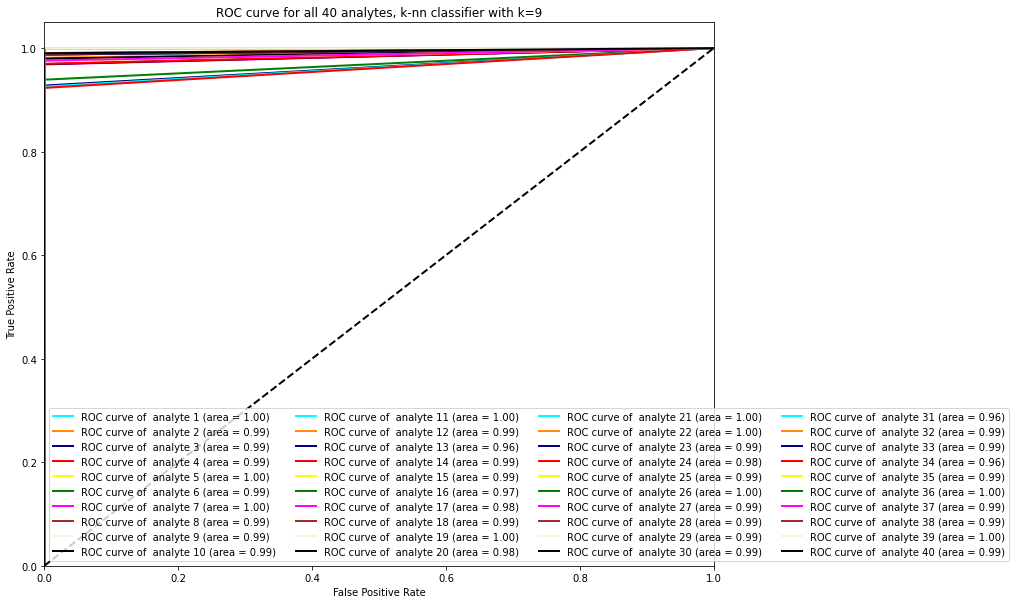

In [18]:
# First aggregate all false positive rates
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Plot all ROC curves
plt.figure(figsize=[12,10])
lw=2
colors = cycle(['cyan', 'darkorange', 'navy','red','yellow','green','magenta','brown','beige','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of  analyte {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all 40 analytes, k-nn classifier with k=9')
plt.legend(loc="best",ncol=4)
plt.show()

In [19]:
#All the forty analytes are analyzed
labels=list(range(1,41))
start_time = time.time()
for j in labels:
    yclass=y.copy()
    yclass[yclass!=j]=0
    yclass[yclass==j]=1
    X_train, X_test, yclass_train, yclass_test = train_test_split(X,yclass,test_size=0.2,random_state=0)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, yclass_train) 
    predictions = neigh.predict(X_test)
    print("confusion matrix for analyte %d :" %j)
    print(confusion_matrix(yclass_test,predictions))
    print("Metrics for predicting analyte %d : accuracy=%.3f, F1-score=%.3f, Precision=%.3f, AUC=%.3f" %(j, neigh.score(X_test,yclass_test), f1_score(yclass_test,predictions),precision_score(yclass_test,predictions),roc_auc_score(yclass_test,predictions)))
print("--- %s seconds ---" % (time.time() - start_time))

confusion matrix for analyte 1 :
[[3516    0]
 [   0   84]]
Metrics for predicting analyte 1 : accuracy=1.000, F1-score=1.000, Precision=1.000, AUC=1.000
confusion matrix for analyte 2 :
[[3493    0]
 [   2  105]]
Metrics for predicting analyte 2 : accuracy=0.999, F1-score=0.991, Precision=1.000, AUC=0.991
confusion matrix for analyte 3 :
[[3504    0]
 [   1   95]]
Metrics for predicting analyte 3 : accuracy=1.000, F1-score=0.995, Precision=1.000, AUC=0.995
confusion matrix for analyte 4 :
[[3510    0]
 [   3   87]]
Metrics for predicting analyte 4 : accuracy=0.999, F1-score=0.983, Precision=1.000, AUC=0.983
confusion matrix for analyte 5 :
[[3497    0]
 [   1  102]]
Metrics for predicting analyte 5 : accuracy=1.000, F1-score=0.995, Precision=1.000, AUC=0.995
confusion matrix for analyte 6 :
[[3518    2]
 [   1   79]]
Metrics for predicting analyte 6 : accuracy=0.999, F1-score=0.981, Precision=0.975, AUC=0.993
confusion matrix for analyte 7 :
[[3513    2]
 [   0   85]]
Metrics for pred

### Analytes 13, 16, 20, 31 and 34   are hard to classify

### PCA before classification

In [20]:
dfset3=b1.copy()
pca = PCA(n_components=50)
pca_result = pca.fit_transform(dfset3)
pca_result.shape

(18000, 50)

In [21]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(pca_result, y)
print("Accuracy estimated by resubstitution", neigh.score(pca_result, y))

Accuracy estimated by resubstitution 0.9721111111111111


In [22]:
# We will find by inspection the best k according to the classifier accuracy on the test set
Xc_train, Xc_test, yc_train, yc_test = train_test_split(pca_result,y, test_size=0.2,random_state=0)

In [23]:
#Calculating  metrics of prediction
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Xc_train, yc_train) 
predictions = neigh.predict(Xc_test)
print("F1-score is=",f1_score(yc_test,predictions, average="weighted"))
print("precision=",precision_score(yc_test,predictions,average="weighted"))
print("The accuracy is=",neigh.score(Xc_test,yc_test))
print("--- %s seconds ---" % (time.time() - start_time))

F1-score is= 0.940510018056018
precision= 0.9426427399935642
The accuracy is= 0.94
--- 1.3955433368682861 seconds ---


In [24]:
##All the forty analytes are analyzed
labels=list(range(1,41))
start_time = time.time()
for j in labels:
    yclass=y.copy()
    yclass[yclass!=j]=0
    yclass[yclass==j]=1
    X_train, X_test, yclass_train, yclass_test = train_test_split(pca_result,yclass,test_size=0.2,random_state=0)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, yclass_train) 
    predictions = neigh.predict(X_test)
    print("Metrics for predicting analyte %d : accuracy=%.3f, F1-score=%.3f, Precision=%.3f" %(j, neigh.score(X_test,yclass_test), f1_score(yclass_test,predictions),precision_score(yclass_test,predictions)))
print("--- %s seconds ---" % (time.time() - start_time))

Metrics for predicting analyte 1 : accuracy=0.999, F1-score=0.982, Precision=1.000
Metrics for predicting analyte 2 : accuracy=0.999, F1-score=0.976, Precision=1.000
Metrics for predicting analyte 3 : accuracy=0.999, F1-score=0.973, Precision=1.000
Metrics for predicting analyte 4 : accuracy=0.997, F1-score=0.935, Precision=1.000
Metrics for predicting analyte 5 : accuracy=0.998, F1-score=0.970, Precision=0.990
Metrics for predicting analyte 6 : accuracy=0.999, F1-score=0.974, Precision=1.000
Metrics for predicting analyte 7 : accuracy=0.999, F1-score=0.970, Precision=1.000
Metrics for predicting analyte 8 : accuracy=0.998, F1-score=0.960, Precision=0.988
Metrics for predicting analyte 9 : accuracy=0.998, F1-score=0.955, Precision=0.974
Metrics for predicting analyte 10 : accuracy=0.999, F1-score=0.981, Precision=1.000
Metrics for predicting analyte 11 : accuracy=0.999, F1-score=0.974, Precision=1.000
Metrics for predicting analyte 12 : accuracy=0.997, F1-score=0.932, Precision=0.943
M